<a href="https://colab.research.google.com/github/taejoonlab/BME603-Proteomics/blob/main/psm/SpectralCount_Percolator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download comet+percolator output from the web repository.

In [14]:
url_data = 'https://pub.taejoonlab.org/BME603/Vogel2010_UPS2/'
filename_pout = 'Vogel2010_UPS2+30uL.UPS2.comet.pout.txt'
url_pout = url_data + 'comet/' + filename_pout

!curl -O $url_pout
!ls
!head *txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  213k  100  213k    0     0  78216      0  0:00:02  0:00:02 --:--:-- 78188
sample_data  Vogel2010_UPS2+30uL.UPS2.comet.pout.txt
PSMId	score	q-value	posterior_error_prob	peptide	proteinIds
/home/taejoon/Class/BME603_Proteomics/Vogel2010_UPS2/comet/Vogel2010_UPS2+30uL.UPS2.comet_13685_3_1	3.68069	0.00245912	1.08503e-06	K.SHCIAEVENDEMPADLPSLAADFVESKDVCK.N	ALBU_HUMAN_UPS
/home/taejoon/Class/BME603_Proteomics/Vogel2010_UPS2/comet/Vogel2010_UPS2+30uL.UPS2.comet_11237_3_1	3.45604	0.00245912	2.52272e-06	K.HTGPGILSMANAGPNTNGSQFFICTAK.T	PPIA_HUMAN_UPS
/home/taejoon/Class/BME603_Proteomics/Vogel2010_UPS2/comet/Vogel2010_UPS2+30uL.UPS2.comet_12087_3_1	3.36137	0.00245912	3.59969e-06	R.LVRPEVDVMCTAFHDNEETFLK.K	ALBU_HUMAN_UPS
/home/taejoon/Class/BME603_Proteomics/Vogel2010_UPS2/comet/Vogel2010_UPS2+30uL.UPS2.comet_12880_3_1	3.28182	0.0024591

As you can see above (first 10 lines of percolator output text), the following six columns are available in the text. 
 1. PSMId	
 1. score	
 1. q-value	
 1. posterior_error_prob	
 1. peptide	
 1. proteinIds

In [29]:
import pprint
pp = pprint.PrettyPrinter(indent=2)

sp_count = dict()
f_pout = open(filename_pout, 'r')
headers = f_pout.readline().strip().split("\t")
for line in f_pout:
  tokens = line.strip().split("\t")
  psm_id = tokens[0]
  score = float(tokens[1])
  qvalue = float(tokens[2])
  pep = float(tokens[3])
  pep_seq = tokens[4]
  prot_id = tokens[5]
  if prot_id not in sp_count:
    sp_count[prot_id] = {'all': 0, 'filtered': 0}
  sp_count[prot_id]['all'] += 1
  if qvalue < 0.05:
    sp_count[prot_id]['filtered'] += 1
f_pout.close()

pp.pprint(sp_count)

{ 'ALBU_HUMAN_UPS': {'all': 118, 'filtered': 87},
  'ANT3_HUMAN_UPS': {'all': 59, 'filtered': 0},
  'ANXA5_HUMAN_UPS': {'all': 35, 'filtered': 0},
  'B2MG_HUMAN_UPS': {'all': 7, 'filtered': 0},
  'BID_HUMAN_UPS': {'all': 21, 'filtered': 0},
  'CAH1_HUMAN_UPS': {'all': 33, 'filtered': 24},
  'CAH2_HUMAN_UPS': {'all': 39, 'filtered': 30},
  'CATA_HUMAN_UPS': {'all': 60, 'filtered': 30},
  'CATD_HUMAN_UPS': {'all': 22, 'filtered': 0},
  'CATG_HUMAN_UPS': {'all': 36, 'filtered': 0},
  'CO5_HUMAN_UPS': {'all': 10, 'filtered': 5},
  'CRP_HUMAN_UPS': {'all': 9, 'filtered': 1},
  'CYB5_HUMAN_UPS': {'all': 6, 'filtered': 2},
  'CYC_HUMAN_UPS': {'all': 19, 'filtered': 1},
  'EGF_HUMAN_UPS': {'all': 5, 'filtered': 3},
  'FABPH_HUMAN_UPS': {'all': 14, 'filtered': 0},
  'GELS_HUMAN_UPS': {'all': 60, 'filtered': 0},
  'GSTA1_HUMAN_UPS': {'all': 36, 'filtered': 0},
  'GSTP1_HUMAN_UPS': {'all': 14, 'filtered': 0},
  'HBA_HUMAN_UPS': {'all': 19, 'filtered': 12},
  'HBB_HUMAN_UPS': {'all': 16, 'filtered

Now you need the input concentration and protein length. 
Download the FASTA file from the repository. 
filename_fasta = 'UPS2.fa.gz'

In [17]:
filename_fasta = 'UPS2.fa'
url_fasta = url_data + filename_fasta
!curl -O $url_fasta
!head $filename_fasta

filename_info = 'UPS2.info.tsv'
url_info = url_data + filename_info
!curl -O $url_info
!head $filename_info

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13213  100 13213    0     0  10379      0  0:00:01  0:00:01 --:--:-- 10379
>ALBU_HUMAN_UPS	P02768ups
AHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAALGL
>NEDD8_HUMAN_UPS	Q15843ups
MLIKVKTLTGKEIEIDIEPTDKVERIKERVEEKEGIPPQQQRLIYSGKQMNDEKTAADYKILGGSVLHLVLALRGGGGLRQ
>RASH_HUMAN_UPS	P01112ups
MTEYKLVVVGAGGVGKS

In [25]:
import pprint
pp = pprint.PrettyPrinter(indent=2)

ups_quant = dict()
f_info = open(filename_info, 'r')
h_info = f_info.readline()
for line in f_info:
  tokens = line.strip().split("\t")
  uniprot_acc = tokens[0]
  ups2_quant = float(tokens[2].replace(',', ''))
  ups_quant[uniprot_acc] = ups2_quant
f_info.close()

ups_info = dict()
f_fa = open(filename_fasta, 'r')
for line in f_fa:
  if line.startswith('>'):
    (prot_id, uniprot_acc) = line.strip().lstrip('>').split()
    uniprot_acc = uniprot_acc.replace('ups', '')

    ups_info[prot_id] = {'len': 0, 'uniprot': uniprot_acc, 'quant': 0.0}
    if uniprot_acc in ups_quant:
      ups_info[prot_id]['quant'] = ups_quant[uniprot_acc]

  else:
    ups_info[prot_id]['len'] += len(line.strip())
f_fa.close()

pp.pprint(ups_info)

{ 'ALBU_HUMAN_UPS': {'len': 584, 'quant': 50000.0, 'uniprot': 'P02768'},
  'ANT3_HUMAN_UPS': {'len': 432, 'quant': 50.0, 'uniprot': 'P01008'},
  'ANXA5_HUMAN_UPS': {'len': 319, 'quant': 0.5, 'uniprot': 'P08758'},
  'B2MG_HUMAN_UPS': {'len': 99, 'quant': 50.0, 'uniprot': 'P61769'},
  'BID_HUMAN_UPS': {'len': 195, 'quant': 50.0, 'uniprot': 'P55957'},
  'CAH1_HUMAN_UPS': {'len': 260, 'quant': 50000.0, 'uniprot': 'P00915'},
  'CAH2_HUMAN_UPS': {'len': 259, 'quant': 50000.0, 'uniprot': 'P00918'},
  'CATA_HUMAN_UPS': {'len': 526, 'quant': 5000.0, 'uniprot': 'P04040'},
  'CATD_HUMAN_UPS': {'len': 244, 'quant': 0.0, 'uniprot': 'P07339'},
  'CATG_HUMAN_UPS': {'len': 235, 'quant': 0.0, 'uniprot': 'P08311'},
  'CO5_HUMAN_UPS': {'len': 74, 'quant': 50000.0, 'uniprot': 'P01031'},
  'CRP_HUMAN_UPS': {'len': 206, 'quant': 0.5, 'uniprot': 'P02741'},
  'CYB5_HUMAN_UPS': {'len': 139, 'quant': 5000.0, 'uniprot': 'P00167'},
  'CYC_HUMAN_UPS': {'len': 104, 'quant': 5.0, 'uniprot': 'P99999'},
  'EGF_HUMAN_U

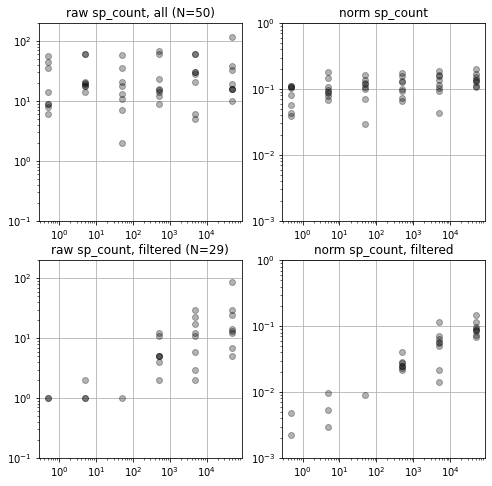

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

quant_list = []
all_spcount_list = []
norm_all_spcount_list = []
filtered_spcount_list = []
norm_filtered_spcount_list = []

for prot_id, prot_info in ups_info.items():
  quant_list.append(prot_info['quant'])
  all_spcount_list.append(sp_count[prot_id]['all'])
  norm_all_spcount_list.append(sp_count[prot_id]['all']/prot_info['len'])
  filtered_spcount_list.append(sp_count[prot_id]['filtered'])
  norm_filtered_spcount_list.append(sp_count[prot_id]['filtered']/prot_info['len'])

ax1.loglog(quant_list, all_spcount_list, 'ko', alpha=0.3)
num_prot = len([x for x in all_spcount_list if x > 0])
ax1.set_title('raw sp_count, all (N=%d)' % num_prot)
ax1.set_ylim(0.1,200)
ax1.grid()

ax2.loglog(quant_list, norm_all_spcount_list, 'ko', alpha=0.3)
ax2.set_title('norm sp_count')
ax2.set_ylim(0.001,1)
ax2.grid()

ax3.loglog(quant_list, filtered_spcount_list, 'ko', alpha=0.3)
num_prot = len([x for x in filtered_spcount_list if x > 0])
ax3.set_title('raw sp_count, filtered (N=%d)' % num_prot)
ax3.set_ylim(0.1,200)
ax3.grid()

ax4.loglog(quant_list, norm_filtered_spcount_list, 'ko', alpha=0.3)
ax4.set_title('norm sp_count, filtered')
ax4.set_ylim(0.001,1)
ax4.grid()
